In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data_train = pd.read_csv(Resource/ACT.csv')
data_test = pd.read_csv(Resource/ACT.csv')

data_train.sample(5)

,Unnamed: 0,price,bedrooms,property_type,postcode
827,827,1190000,5,1,904
2224,2224,703000,4,1,603
10061,10061,512000,3,0,610
6600,6600,724000,4,1,711
5112,5112,870000,4,1,716


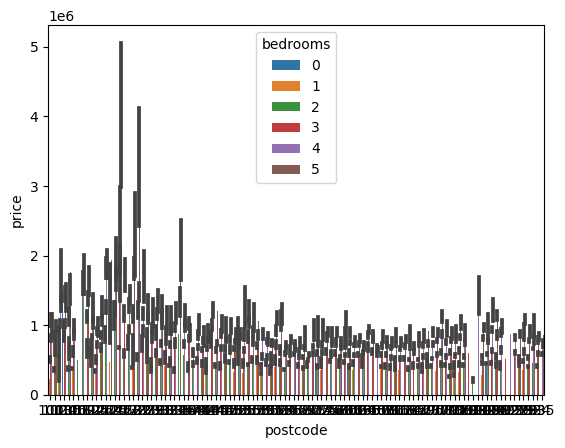

In [2]:
sns.barplot(x="postcode", y="price", hue="bedrooms", data=data_train);

In [4]:
sns.pointplot(x="postcode", y="price", hue="property_type", data=data_train,
              palette={2: "blue", 1: "pink"},
              markers=["*", "o"], linestyles=["-", "--"]);

KeyError: 0

In [ ]:
data_train.price.describe()

In [ ]:
def bedrooms(df):
    df.bedrooms = df.bedrooms
    bins = (10, 50, 100, 1000, 2500, 5000)
    group_names = ['1 Bedrooms', '2 Bedrooms', '3 Bedrooms', '4 Bedrooms', '5 Bedrooms']
    categories = pd.cut(df.bedrooms, bins, labels=group_names)
    df.bedrooms = categories
    return df

def postcode(df):
    df.postcode = df.postcode
    bins = (5, 20, 40, 100, 200, 300, 400, 500)
    group_names = ['100-200', '201-300', '301-400', '401-500', '501-600', '601-700', '701-800', '801-900', '901-999']
    categories = pd.cut(df.postcode, bins, labels=group_names)
    df.postcode = categories
    return df

def transform_features(df):
    df = bedrooms(df)
    df = postcode(df)
    return df

data_train = transform_features(data_train)
data_test = transform_features(data_test)
data_train.head()

In [ ]:
sns.barplot(x="bedrooms", y="price", hue="property_type", data=data_train);

In [ ]:
sns.barplot(x="postcode", y="price", hue="property_type", data=data_train);

In [ ]:
from sklearn import preprocessing
def encode_features(df_train, df_test):
    features = ['price', 'postcode', 'bedrooms']
    df_combined = pd.concat([df_train[features], df_test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test
    
data_train, data_test = encode_features(data_train, data_test)
data_train.head()

In [ ]:
from sklearn.model_selection import train_test_split

X_all = data_train.drop(['price', 'postcode'], axis=1)
y_all = data_train['price']

num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=23)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = RandomForestClassifier()

# Choose some parameter combinations to try
parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

In [ ]:
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))